# KNN Housing Price Prediction

Predicting house prices using K-Nearest Neighbors algorithm implemented from scratch.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## 1. Load Data

In [ ]:
df = pd.read_csv('datasets/Housing.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

## 2. Preprocess Data

In [ ]:
df_processed = df.copy()

# Encode categorical variables
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_processed[col] = pd.factorize(df_processed[col])[0]

print("Processed data:")
print(df_processed.head())

## 3. Prepare Features and Target

In [ ]:
X = df_processed.drop('price', axis=1).values
y = df_processed['price'].values

# Normalize features
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_normalized = (X - X_min) / (X_max - X_min)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

## 4. Implement KNN Algorithm

In [ ]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Store training data."""
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        """Calculate Euclidean distance between two points."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        """Predict values for X."""
        predictions = []
        for x in X:
            # Calculate distances to all training points
            distances = np.array([self.euclidean_distance(x, x_train) 
                                  for x_train in self.X_train])
            
            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get values of k nearest neighbors
            k_values = self.y_train[k_indices]
            
            # Average (for regression)
            prediction = np.mean(k_values)
            predictions.append(prediction)
        
        return np.array(predictions)

print("KNN class implemented!")

## 5. Train and Evaluate

In [ ]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== KNN Performance (k=5) ===")
print(f"Train RMSE: ${train_rmse:,.0f}")
print(f"Test RMSE:  ${test_rmse:,.0f}")
print(f"Train R²:   {train_r2:.4f}")
print(f"Test R²:    {test_r2:.4f}")

## 6. Visualize Results

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted on Test Set
axes[0].scatter(y_test, y_test_pred, alpha=0.6, s=30)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Actual vs Predicted Prices (Test Set)')
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, s=30)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot (Test Set)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

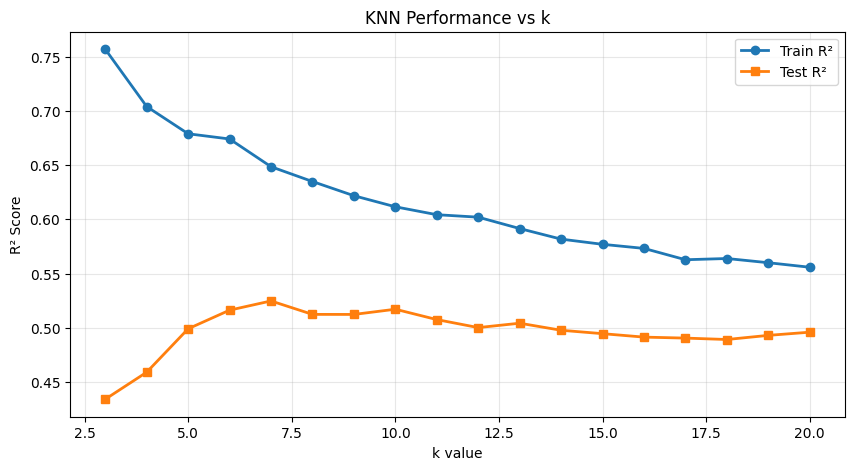

Best k value: 7 (Test R² = 0.5248)


In [8]:
k_values = range(3, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn_temp = KNN(k=k)
    knn_temp.fit(X_train, y_train)
    
    y_train_pred_temp = knn_temp.predict(X_train)
    y_test_pred_temp = knn_temp.predict(X_test)
    
    train_scores.append(r2_score(y_train, y_train_pred_temp))
    test_scores.append(r2_score(y_test, y_test_pred_temp))

plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores, 'o-', label='Train R²', linewidth=2)
plt.plot(k_values, test_scores, 's-', label='Test R²', linewidth=2)
plt.xlabel('k value')
plt.ylabel('R² Score')
plt.title('KNN Performance vs k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

best_k = k_values[np.argmax(test_scores)]
print(f"Best k value: {best_k} (Test R² = {max(test_scores):.4f})")